<a href="https://www.kaggle.com/code/bharat04/pima-indians-diabetes-simple-eda-prediction-88?scriptVersionId=103678884" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Importing Visualization Libraries


In [2]:

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
px_template = "simple_white"

# importing Pima Indians Diabetes Database 

In [3]:

df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**checking shape or size of a dataset**

In [4]:
df.shape

(768, 9)

**Variables name in dataset**

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**checking information about dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**describing dataset**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**number of unique values in variables**

In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# Data Preprocessing

**checking null values in dataset**

In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

there is no null values in this dataset

**checking duplicate values in dataset**

In [10]:
df.duplicated().sum()

0

there is no duplicate values in this dataset

**Replacing 0 values in df with median**

In [11]:
#replacing 0 values in df

for i in ["Glucose","BMI","Insulin","BloodPressure"]:
    df[i].replace({0:df[i].median()},inplace = True)

In [12]:
#describing dataset after replaceing 0 values in variables 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Outlier Treatment

**cheking outliers in variable**

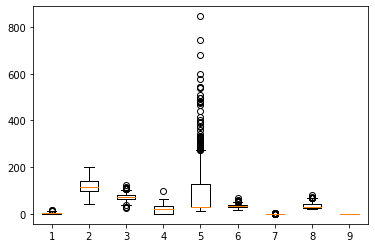

In [13]:
#checking outliers with the help of boxplot

plt.boxplot(df);


there is many outliers in different varibles except **Glucose** and **Outcome**

**treating outliers**

In [14]:
def outlier_treatment():
    l = ["BMI","Glucose","SkinThickness","Age","BloodPressure","Insulin","Pregnancies","DiabetesPedigreeFunction"]
    for i in l:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        df[i]  = np.where(df[i]>uw,uw,(np.where(df[i]<lw,lw,df[i])))
        
outlier_treatment()

**boxplot after treating outliers**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

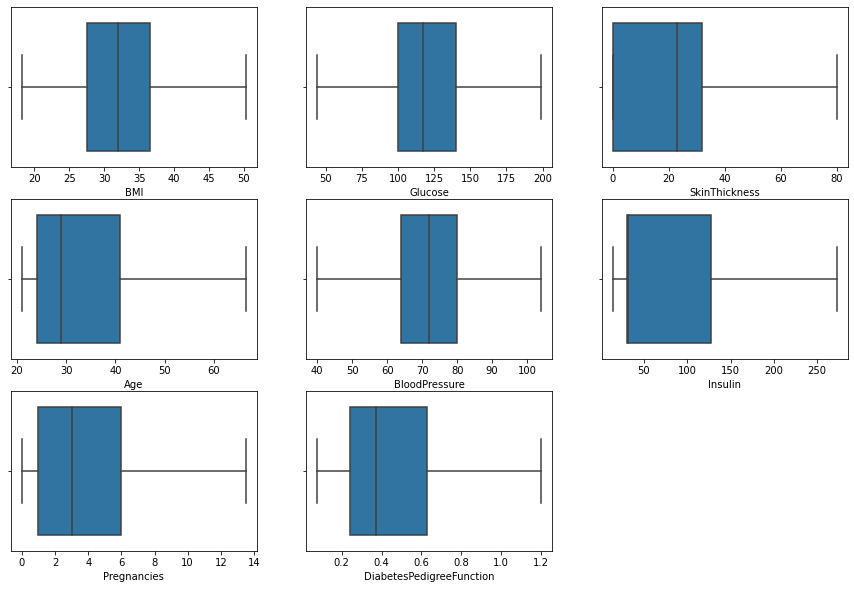

In [15]:
pno = 1
plt.figure(figsize=(15,10))
for i in ["BMI","Glucose","SkinThickness","Age","BloodPressure","Insulin","Pregnancies","DiabetesPedigreeFunction"]:
        if pno<9:
            plt.subplot(3,3,pno)
            sns.boxplot(df[i]);
            plt.xlabel(i)
            pno+=1

# Visualization of dataset

**Variables:**

Pregnancies: The number of pregnancies

Glucose: The plasma glucose concentration in the oral glucose tolerance test after two hours

Blood Pressure: Blood Pressure (Small blood pressure) (mmHg)

SkinThickness: Skin Thickness

Insulin: 2-hour serum insulin (mu U/ml)

DiabetesPedigreeFunction: This function calculates the likelihood of having diabetes based on the lineage of a descendant

BMI: Body mass index

Age: Age (year)

Outcome: Have the disease (1) or not (0)


**histplot of all variables**

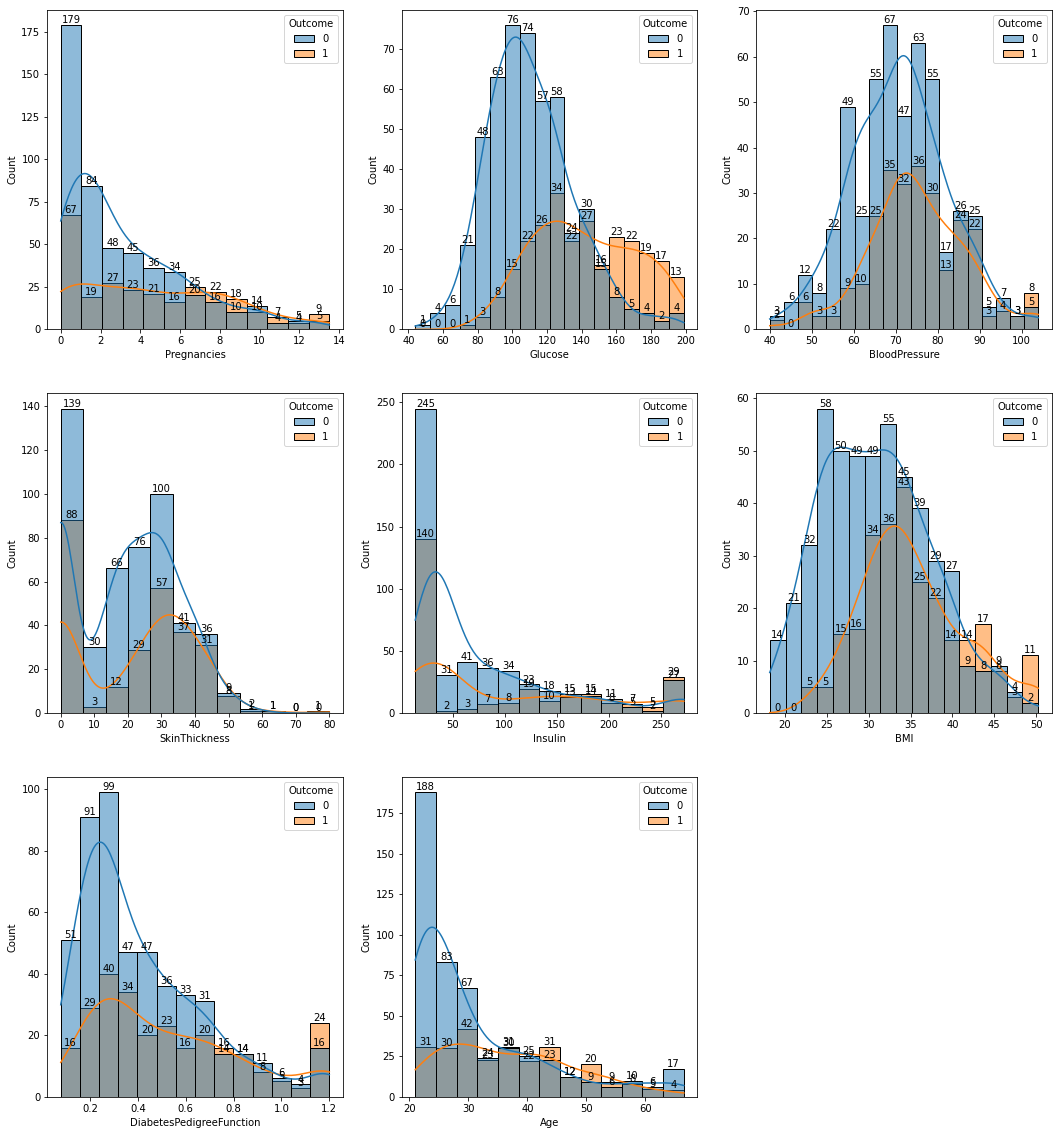

In [16]:
pno = 1
plt.figure(figsize=(18,20))
for i in df.columns:
        if pno<9:
            plt.subplot(3,3,pno)
            ax = sns.histplot(data = df , x = i , hue = df.Outcome , kde = True);
            plt.xlabel(i)
            pno+=1
            for i in ax.containers:     #to set a label on top of the bars.
                ax.bar_label(i,)

**result:**

1. when the number of pregnancies increases the risk of diabetes also increase.

2. when the level of Glucose increase above 140 the risk of diabetes also increase.

3. blood pressure between 60 to 90 have more diabetic people then other rate.

4. risk of diabetes increase when skin thickness increase.

5. insulin level affect diabetes when its level increase the risk of diabetes also increase.

6. when BMI increase above 30 the risk of diabetes also increase.

7. risk of diabetes increase when age increase.

**Pairplot of dataset**

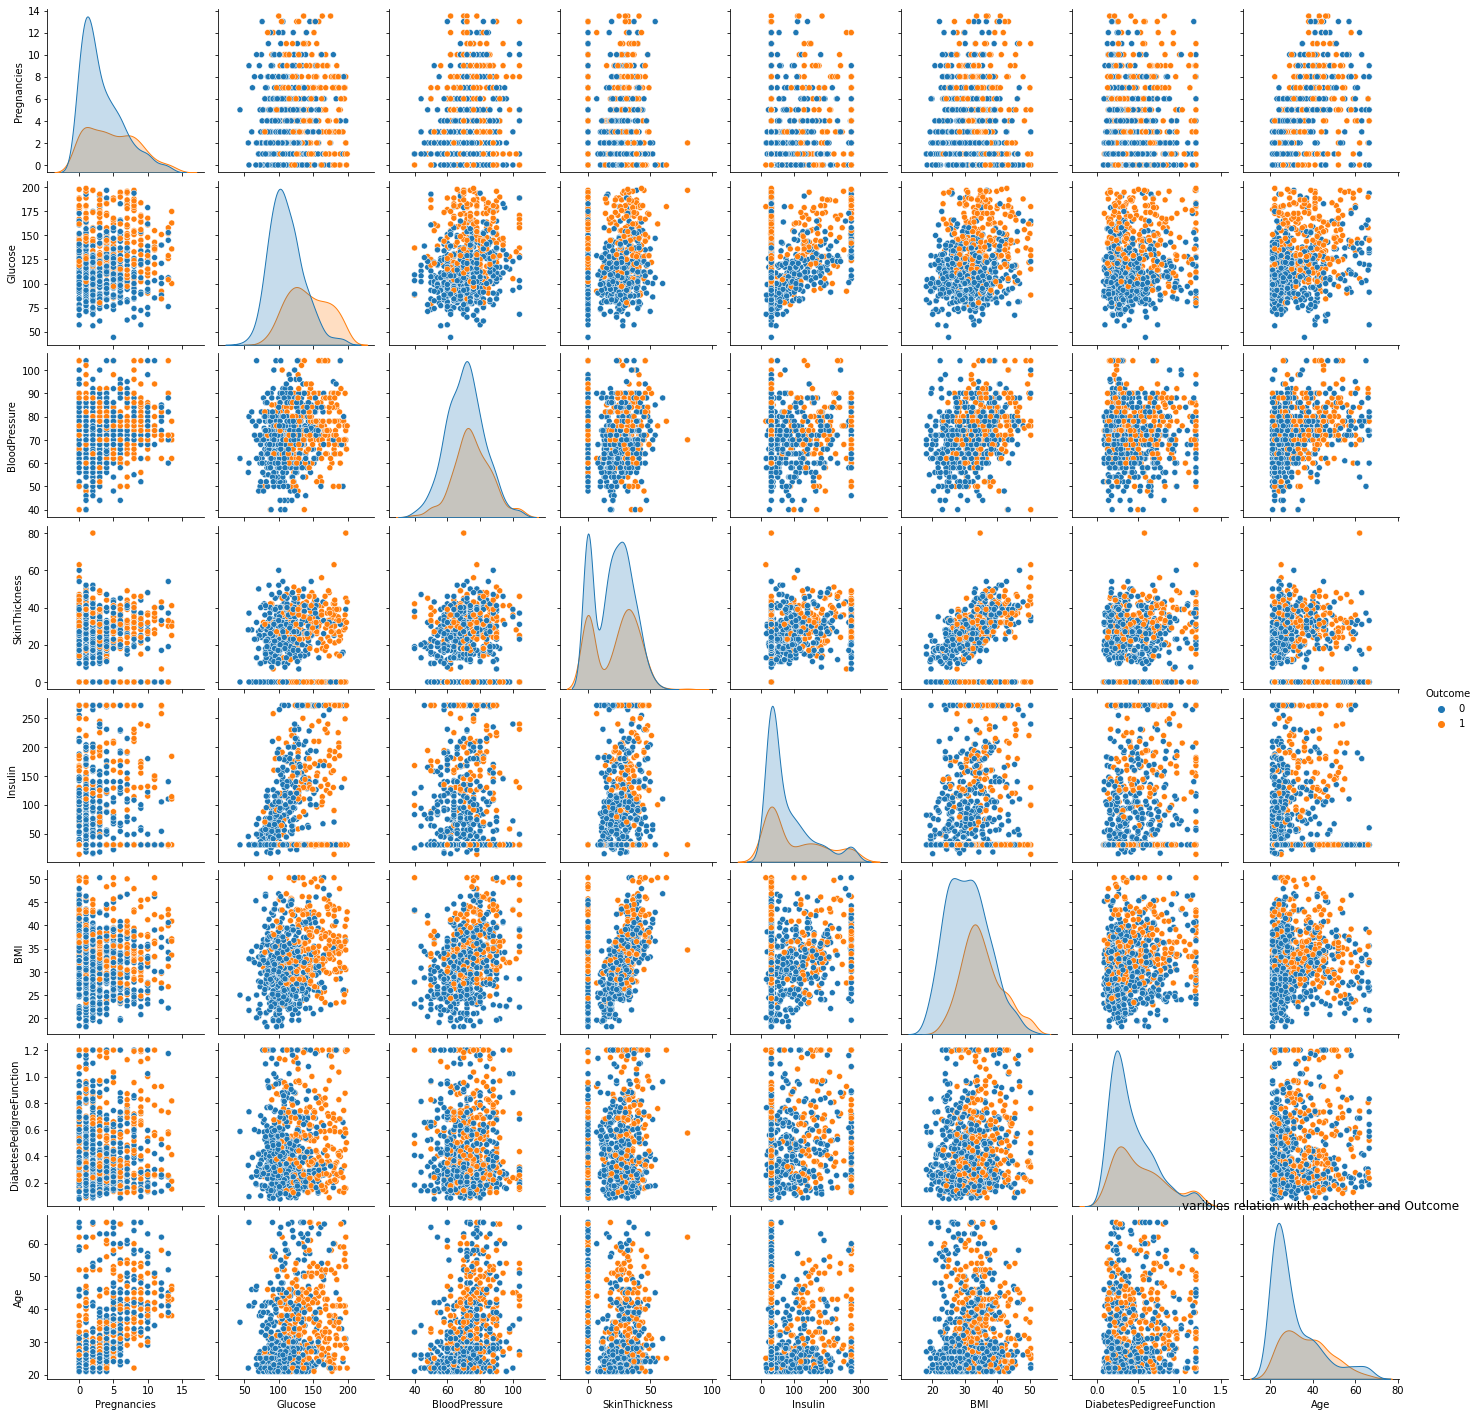

In [17]:
# variables relation with Outcome


sns.pairplot(df , hue = "Outcome" );
plt.title("varibles relation with eachother and Outcome");

**result:**

1. high Glucose level in pregnanci increase the risk of diabetes.

2. BMI Above 30 and high level of Glucose togather increase the risk of diabetes.

3. we can see here that increasing Glucose level is the key factor which increase the risk of diabetes.

4. High Glucose level along with other variables increase the risk of diabetes.



**value count of variable Outcome**

In [18]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Countplot of variable Outcome**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


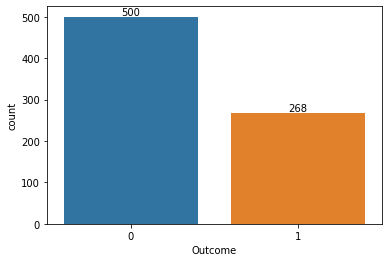

In [19]:
ax = sns.countplot("Outcome" , data = df);

for i in ax.containers:     #to set a label on top of the bars.
    ax.bar_label(i,)

# **Machine learning for prediction**

**separating target variable**

In [20]:
x = df.drop(columns = ["Outcome"])       
y = df["Outcome"]                        #target variable

**Checking correlation between variables**

In [21]:
df.corr()["Outcome"].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.313030
Age                         0.242702
Pregnancies                 0.220392
DiabetesPedigreeFunction    0.184969
BloodPressure               0.168971
Insulin                     0.147295
SkinThickness               0.073125
Name: Outcome, dtype: float64

**Heatmap of correlation**

Text(0.5, 1.0, 'correlation of feature')

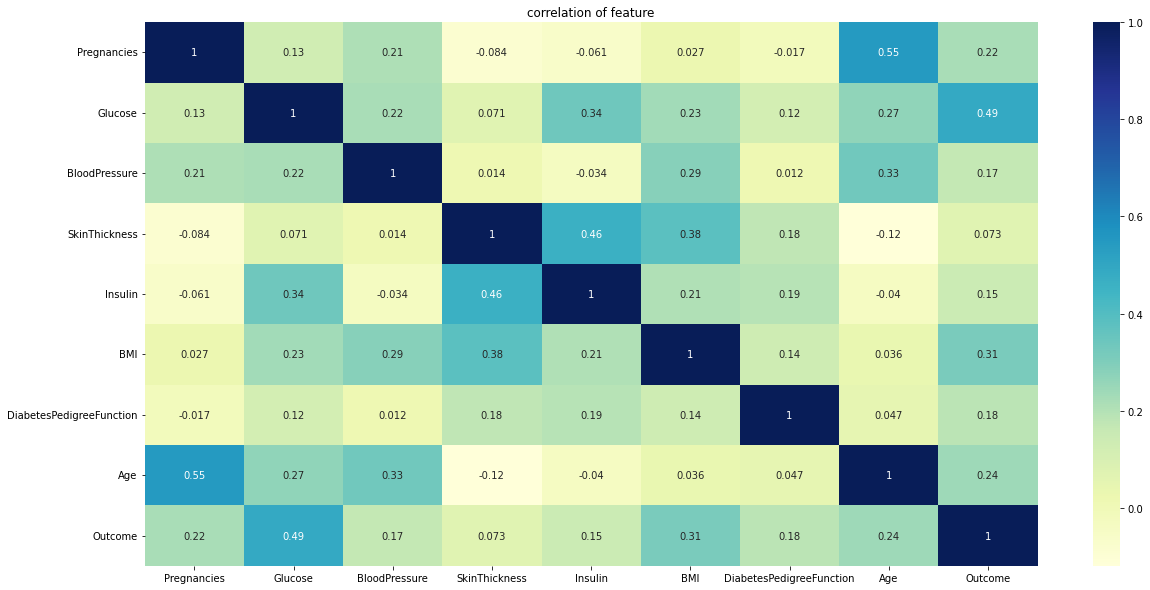

In [22]:
#using heatmap to understand correlation better in dataset df 
#Heatmap of correlation


plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlGnBu' )
plt.title("correlation of feature")

**importing train_test_split to split data for training and testing**

In [23]:
from sklearn.model_selection import train_test_split

**spliting data**

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.02,random_state =123)

**importing logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
#fitting data in Logisticregression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [27]:
#predicting data with the help of logistic regression

Ypred = logreg.predict(x_test)

**Checking Scores**

In [28]:
from sklearn.metrics import classification_report , accuracy_score , f1_score,roc_curve,roc_auc_score,confusion_matrix

In [29]:
#Confusion Matrix

confusion_matrix(y_test,Ypred)


array([[8, 1],
       [1, 6]])

**Accuracy_score**

In [30]:
accuracy_score(y_test,Ypred)

0.875

**F1 Score**

In [31]:
f1_score(y_test,Ypred)

0.8571428571428571

**classification Report**

In [32]:
clsl = classification_report(y_test,Ypred)
print(clsl)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.86      0.86      0.86         7

    accuracy                           0.88        16
   macro avg       0.87      0.87      0.87        16
weighted avg       0.88      0.88      0.88        16



**Roc Curve**

In [33]:
fpr,tpr,threshold = roc_curve(y_test , Ypred)
print(fpr)
print(tpr)
print(threshold)

[0.         0.11111111 1.        ]
[0.         0.85714286 1.        ]
[2 1 0]


**roc auc Score**

In [34]:
roc_auc_score(y_test,Ypred)

0.873015873015873

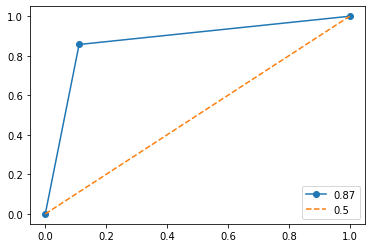

In [35]:
#roc curve with roc auc score

plt.plot(fpr,tpr, marker = "o");
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],"--")
plt.legend([0.87,0.5])